In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve, precision_recall_curve, auc, average_precision_score, classification_report, accuracy_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction/data.csv


In [2]:
 
df = pd.read_csv('/kaggle/input/heart-attack-prediction/data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [3]:
df=df.replace('?',np.nan)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,NaN,NaN,NaN,1
290,54,0,3,130,294,0,1,100,1,0.0,2,NaN,NaN,1
291,56,1,4,155,342,1,0,150,1,3.0,2,NaN,NaN,1
292,58,0,2,180,393,0,0,110,1,1.0,2,NaN,7,1


In [4]:

df=df.drop(['slope','ca','thal'],axis=1)

df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [5]:
df = df.dropna().copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [6]:
df = df.rename(columns={'num       ': 'target'})

In [7]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # All columns except 'num'
y = df['target']  # Target variable
# Verify shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (261, 10)
Target shape: (261,)


In [8]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (208, 10)
Test set size: (53, 10)


In [9]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize model with increased max_iter to ensure convergence
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Check model coefficients
print("\nModel coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [[-0.11291056  0.48433971  0.8033119  -0.1176559   0.25991967  0.58024838
  -0.08245576 -0.14586165  0.6468694   0.80162488]]
Model intercept: [-0.72638567]


In [11]:
from sklearn.svm import SVC
model2=SVC(
    kernel='rbf',
    max_iter=1000,
    random_state=42,
    probability=True
    
  
)
model2.fit(X_train_scaled,y_train)
y_predic=model2.predict(X_test_scaled)
print(classification_report(y_test,y_predic))
print(confusion_matrix(y_test,y_predic))
print(accuracy_score(y_test,y_predic))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        33
           1       0.71      0.75      0.73        20

    accuracy                           0.79        53
   macro avg       0.78      0.78      0.78        53
weighted avg       0.79      0.79      0.79        53

[[27  6]
 [ 5 15]]
0.7924528301886793


In [12]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Score:",model.score(X_test_scaled,y_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.74      0.85      0.79        20

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53


Confusion Matrix:
[[27  6]
 [ 3 17]]

Accuracy: 0.8301886792452831
Score: 0.8301886792452831


In [13]:
from sklearn.ensemble import RandomForestClassifier
RFCmodel=RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42
)
RFCmodel.fit(X_train_scaled,y_train)
RFC_predic=RFCmodel.predict(X_test_scaled)
print(classification_report(y_test,RFC_predic))
print(confusion_matrix(y_test,RFC_predic))
print(accuracy_score(y_test,RFC_predic))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.74      0.85      0.79        20

    accuracy                           0.83        53
   macro avg       0.82      0.83      0.82        53
weighted avg       0.84      0.83      0.83        53

[[27  6]
 [ 3 17]]
0.8301886792452831


In [14]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train_scaled,y_train)
nbpredic=NB_model.predict(X_test_scaled)
print(classification_report(y_test,nbpredic))
print(confusion_matrix(y_test,nbpredic))
print(accuracy_score(y_test,nbpredic))


              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.71      0.85      0.77        20

    accuracy                           0.81        53
   macro avg       0.80      0.82      0.81        53
weighted avg       0.83      0.81      0.81        53

[[26  7]
 [ 3 17]]
0.8113207547169812


In [15]:
from xgboost import XGBClassifier

modelXGB = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
modelXGB.fit(X_train_scaled, y_train)
xg=modelXGB.predict(X_test_scaled)
print(classification_report(y_test,xg))
print(confusion_matrix(y_test,xg))
print(accuracy_score(y_test,xg))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        33
           1       0.68      0.75      0.71        20

    accuracy                           0.77        53
   macro avg       0.76      0.77      0.76        53
weighted avg       0.78      0.77      0.78        53

[[26  7]
 [ 5 15]]
0.7735849056603774


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.70      0.80      0.74        20

    accuracy                           0.79        53
   macro avg       0.78      0.79      0.78        53
weighted avg       0.80      0.79      0.79        53

[[26  7]
 [ 4 16]]
0.7924528301886793


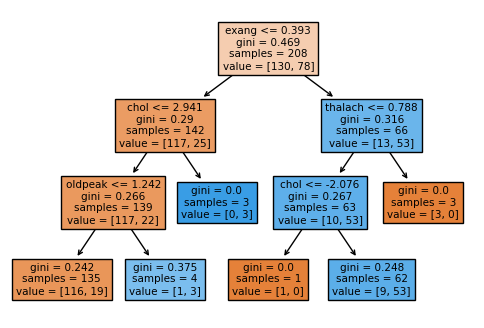

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model3 = DecisionTreeClassifier(
    max_depth=3,  # Limit depth for simplicity
    random_state=42
)
model3.fit(X_train_scaled, y_train)
DT=model3.predict(X_test_scaled)
print(classification_report(y_test,DT))
print(confusion_matrix(y_test,DT))
print(accuracy_score(y_test,DT))

# Visualize the tree
plt.figure(figsize=(6, 4))
plot_tree(model3, feature_names=X.columns, filled=True)
plt.show()

In [17]:
from sklearn.ensemble import VotingClassifier

# Define models
models = [
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
]

# Voting classifier (soft voting = average probabilities)
ensemble = VotingClassifier(models, voting='soft')
ensemble.fit(X_train_scaled, y_train)
Df=ensemble.predict(X_test_scaled)
print(classification_report(y_test,Df))
print(confusion_matrix(y_test,Df))
print(accuracy_score(y_test,Df))


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.68      0.65      0.67        20

    accuracy                           0.75        53
   macro avg       0.74      0.73      0.74        53
weighted avg       0.75      0.75      0.75        53

[[27  6]
 [ 7 13]]
0.7547169811320755


Text(0.5, 1.0, 'Confusion Matrix')

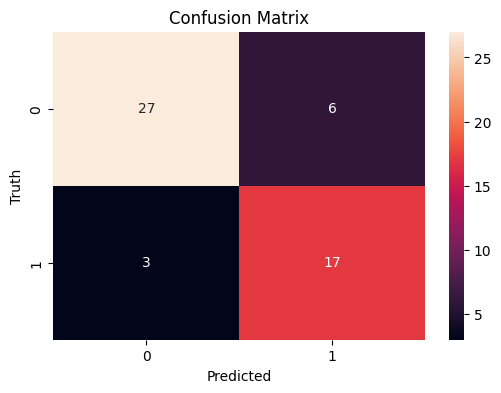

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,xticklabels=df["target"].unique(),yticklabels=df["target"].unique())
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")

In [19]:
# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Positive coefficients increase probability of heart disease
# Negative coefficients decrease probability


Feature Importance:
    Feature  Coefficient
2        cp     0.803312
9   oldpeak     0.801625
8     exang     0.646869
5       fbs     0.580248
1       sex     0.484340
4      chol     0.259920
6   restecg    -0.082456
0       age    -0.112911
3  trestbps    -0.117656
7   thalach    -0.145862


In [20]:
# Example new patient data (using the same features in order)
new_patient = [[45, 1, 3, 140, 250, 0, 1, 160, 0, 1.2]]  # 45-year-old male

# Scale the new data using the same scaler
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)
pred_prob = model.predict_proba(new_patient_scaled)

print("\nNew Patient Prediction:")
print("Predicted class:", prediction[0])  # 0 or 1
print("Probability [class 0, class 1]:", pred_prob[0])


New Patient Prediction:
Predicted class: 0
Probability [class 0, class 1]: [0.67869556 0.32130444]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


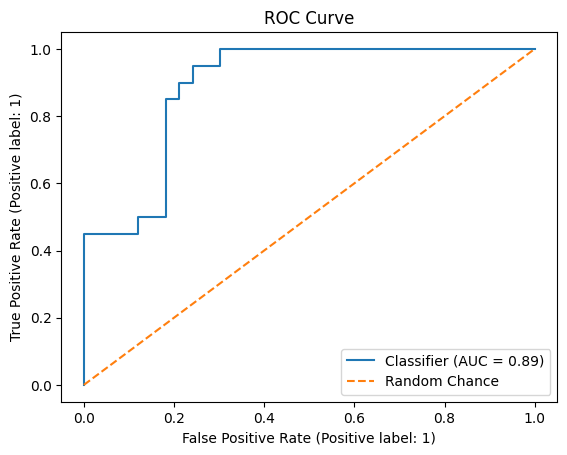

In [21]:
from sklearn.metrics import RocCurveDisplay

y_pred_prob = RFCmodel.predict_proba(X_test_scaled)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Chance')
plt.title('ROC Curve')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

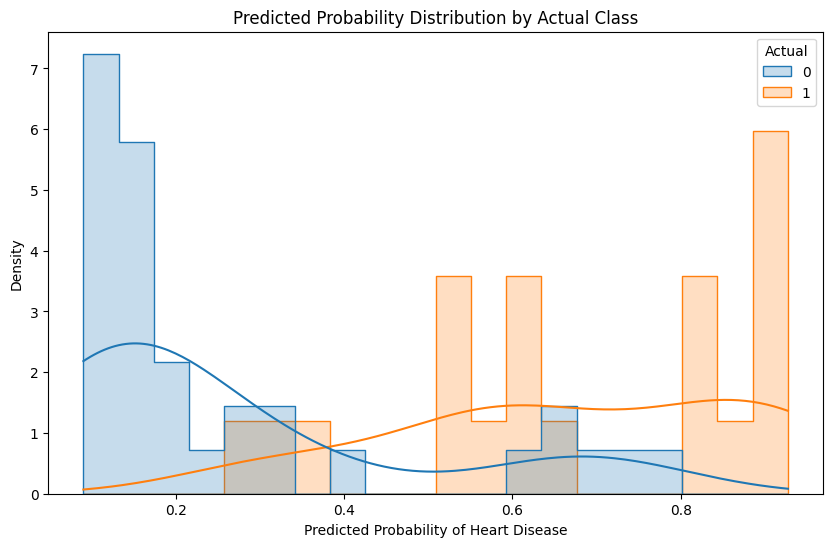

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(data=pd.DataFrame({'Prob': y_pred_prob, 'Actual': y_test}),
             x='Prob', hue='Actual', bins=20, kde=True,
             element='step', stat='density', common_norm=False)
plt.title('Predicted Probability Distribution by Actual Class')
plt.xlabel('Predicted Probability of Heart Disease')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


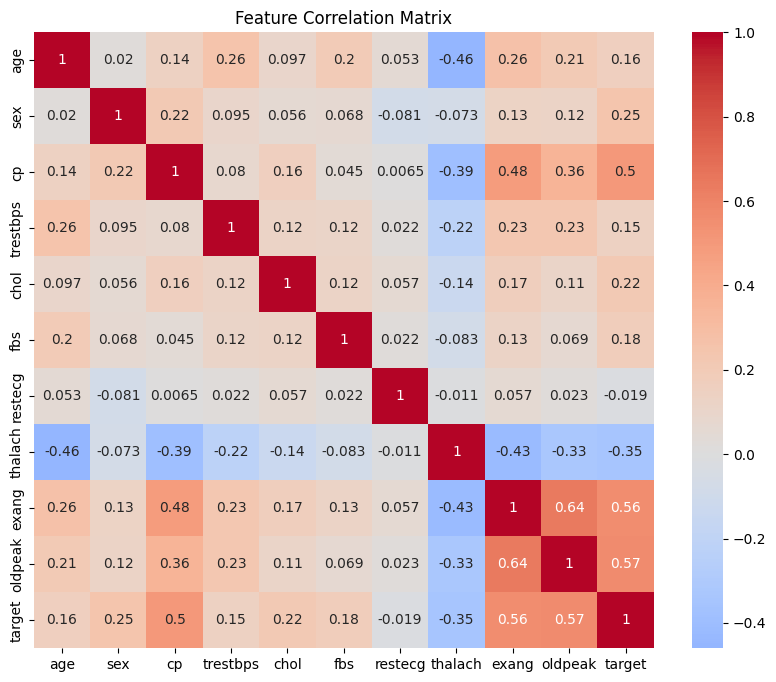

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

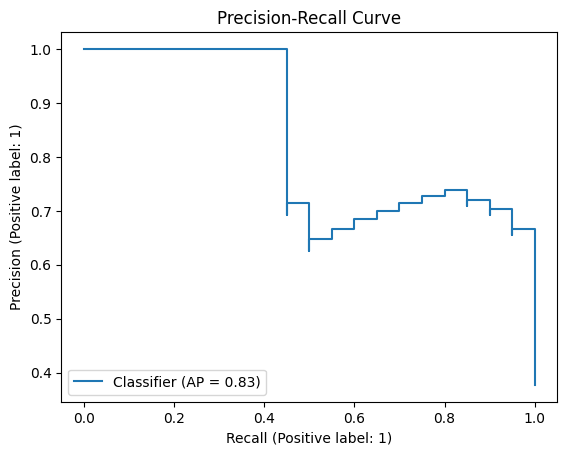

In [24]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob)
plt.title('Precision-Recall Curve')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

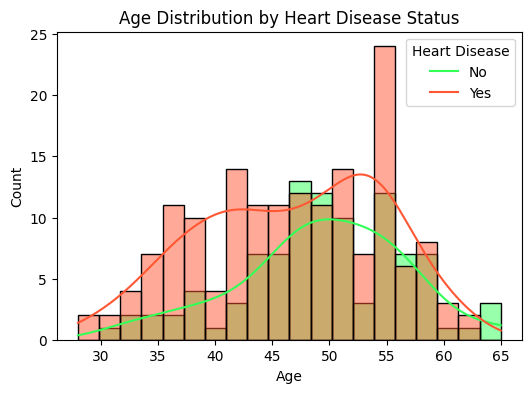

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20, palette=['#FF5733', '#33FF57'])
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

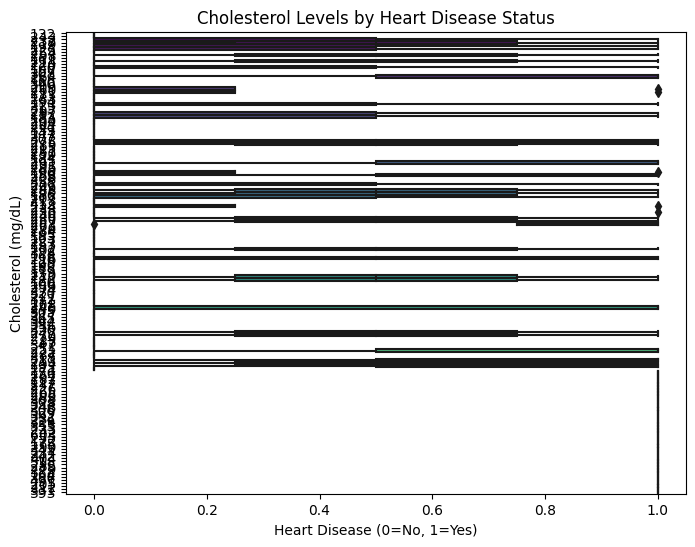

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='chol', palette='viridis')
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

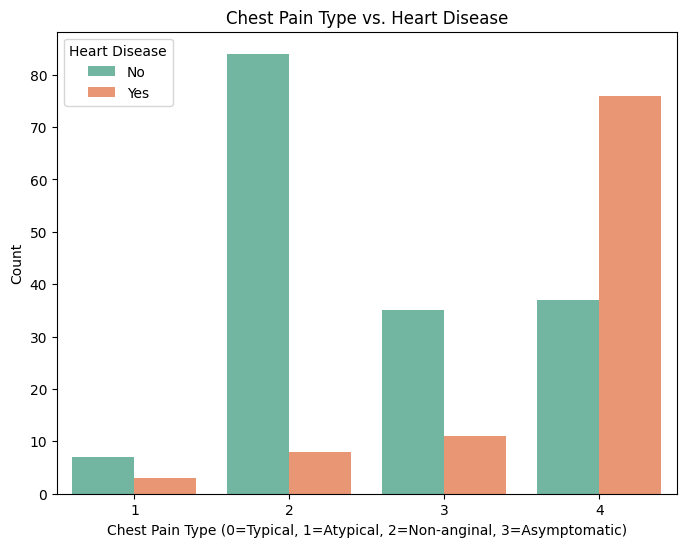

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', hue='target', palette='Set2')
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type (0=Typical, 1=Atypical, 2=Non-anginal, 3=Asymptomatic)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [28]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='chol', z='thalach', color='target')
fig.show()